In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
import os

In [2]:
os.chdir(r"c:\Users\lanel\OneDrive\Desktop\Data Analytics info\University of Oregon\UO-Data-Analysis-Project_1\UO-Data-Analysis-Project_1-Video-Game-Marketing\Resources")

current_directory = os.getcwd()

csv_path = os.path.join(current_directory, 'vg_sales_updated.csv')

# Load the CSV file created in Part 1 into a Pandas DataFrame
vg_df = pd.read_csv(csv_path)

# Display sample data
vg_df.head()

,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,Pokémon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37


In [3]:
#filter out null values
filtered_df = vg_df[vg_df['critic_score'].notnull()]
filtered_df

,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,Pokémon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,2041,Sea of Thieves,PC,2018,Action-Adventure,Microsoft Studios,Rare Ltd.,6.7,NaN,NaN,NaN,NaN,NaN,NaN
2041,2042,Minecraft,PC,2010,Misc,Mojang,Mojang AB,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2042,2043,Hyrule Warriors: Age of Calamity,NS,2020,Action,Nintendo,Koei Tecmo Games,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2043,2044,Ghost of Tsushima,PS4,2020,Action-Adventure,Sony Interactive Entertainment,Sucker Punch,8.8,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#filter out publishers with less than 10 games to gheir name
game_counts_pub = filtered_df['publisher'].value_counts()
game_counts_pub_10 = game_counts_pub[game_counts_pub < 10].reset_index()
less_thatn_10 = game_counts_pub_10["index"].tolist()
filtered_df_pub = filtered_df[filtered_df['publisher'].isin(less_thatn_10) == False]
filtered_df_pub


,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,Pokémon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2014,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,Monolith Soft,9.3,NaN,0.39,0.22,0.16,0.07,0.83
2014,2015,Ace Combat 3: Electrosphere,PS,1999,Simulation,Sony Computer Entertainment,Namco,7.6,NaN,0.22,0.15,0.40,0.05,0.83
2036,2037,SimCity 3000,PC,1998,Simulation,Electronic Arts,Maxis,8.5,NaN,NaN,0.00,NaN,0.00,0.00
2037,2038,Half-Life 2: Episode One,PC,2006,Shooter,Electronic Arts,Valve Software,8.7,NaN,NaN,0.00,NaN,0.00,0.00


In [5]:
#repeat for developers
game_counts_dev = filtered_df['developer'].value_counts()
game_counts_dev_10 = game_counts_dev[game_counts_dev < 10].reset_index()
less_thatn_10_dev = game_counts_dev_10["index"].tolist()

filtered_df_dev = filtered_df[filtered_df['developer'].isin(less_thatn_10_dev) == False]


In [6]:
#group by each publisher and find the mean critic score of each
grouped_vg_df_pub = filtered_df_pub.groupby(['publisher'])
grouped_vg_df_pub_mean=grouped_vg_df_pub['critic_score'].mean().reset_index()
grouped_vg_df_pub_mean=grouped_vg_df_pub_mean.sort_values(by='critic_score')
pd.set_option('display.max_rows', None)
grouped_vg_df_pub_mean.set_index("publisher")

,critic_score
publisher,
THQ,7.302381
Sega,7.447170
Warner Bros. Interactive Entertainment,7.520000
LucasArts,7.687500
Konami Digital Entertainment,7.892593
Ubisoft,7.906522
Midway Games,7.910000
Ubisoft,7.914286
Activision,7.958025


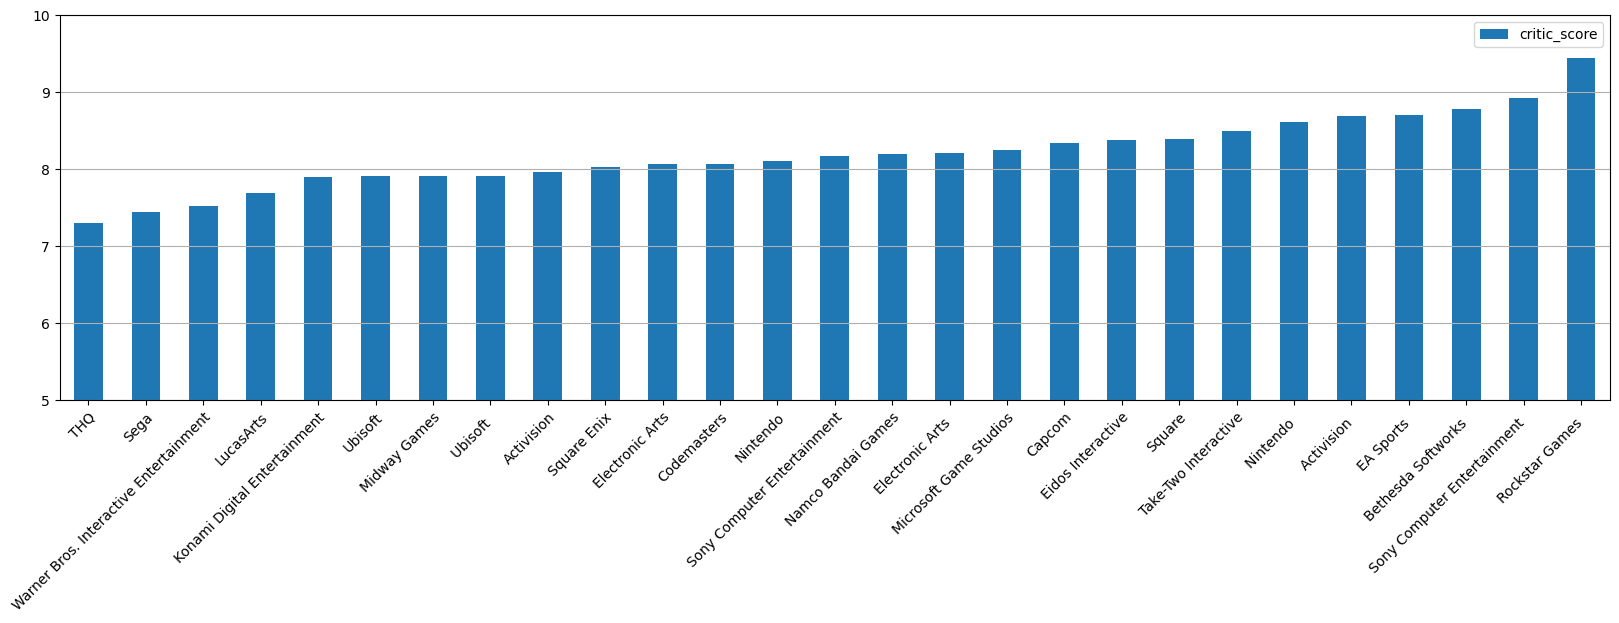

In [7]:
#create bar chart comparing the averate critic review for each publisher
vg_bar_pub = grouped_vg_df_pub_mean.plot(kind = "bar", figsize=(20,5))
vg_bar_pub.set_xticklabels(grouped_vg_df_pub_mean["publisher"], rotation=45, ha='right', rotation_mode='anchor')

plt.ylim([5, 10])
plt.grid(axis = 'y')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Rockstar Games  '),
  Text(1, 0, 'EA Sports  '),
  Text(2, 0, 'Take-Two Interactive'),
  Text(3, 0, 'Square'),
  Text(4, 0, 'Bethesda Softworks')])

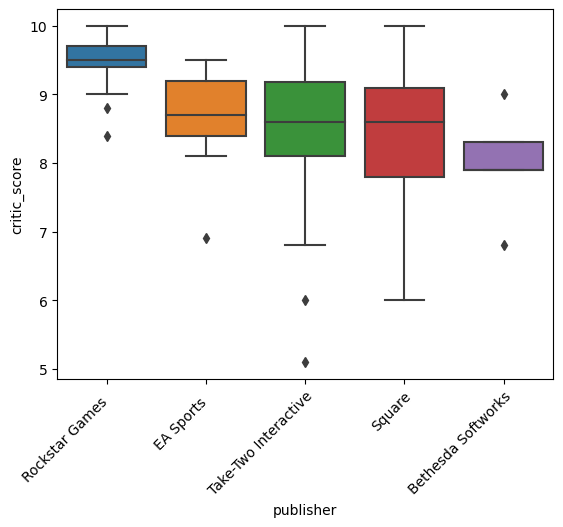

In [8]:
top_5_means = filtered_df[filtered_df["publisher"].isin(['Rockstar Games  ', 'Bethesda Softworks', 'EA Sports  ', 'Take-Two Interactive',
                                                                         'Square'])]
outlier_map = sns.boxplot(x="publisher", y="critic_score", data=top_5_means)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')